In [1]:
import networkx as nx
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import copy
from scipy.linalg import *

In [2]:
nodes = 50
p = 0.1
pref_range = 10
pref_dim = 1
mean_pref = 0
std_pref = 10

/Users/sun/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/sun/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated

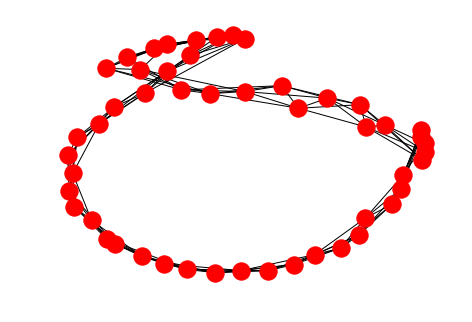

In [9]:
new_Graph = nx.watts_strogatz_graph(n = 50, k = 6, p = 0)
pos =  nx.circular_layout(new_Graph)
nx.draw(new_Graph)
plt.show()

In [16]:
new_Graph[0]

{1: {}, 2: {}, 3: {}, 47: {}, 48: {}, 49: {}}

In [17]:
friends_pref = {}
friends_pref[0] = {}
Graph = nx.erdos_renyi_graph(nodes, p)
for n in Graph.nodes():
    Graph.node[n]['pref'] = [np.random.randint(1, pref_range) for i in range(pref_dim)] 
edges = Graph.edges()
weighted_edges = np.random.normal(mean_pref, std_pref, len(edges))

In [19]:
Graph.node[0]

{'pref': [4]}

In [5]:
for index in range(len(edges)):
    Graph.add_weighted_edges_from([(edges[index][0], edges[index][1], weighted_edges[index])])

In [6]:
Graph.neighbors(0)

[13, 22, 37, 41, 43]

In [7]:
Graph[0]

{13: {'weight': -11.386338110647387},
 22: {'weight': 5.14550040337491},
 37: {'weight': -11.82804084276719},
 41: {'weight': -24.436350851802633},
 43: {'weight': -15.271891178721514}}

In [15]:
a = nx.linalg.laplacian_matrix(Graph)
L = a.todense()

In [16]:
L = pinv(L)

/Users/sun/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1321: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  x, resids, rank, s = lstsq(a, b, cond=cond, check_finite=False)


In [18]:
eigvals, eigvecs = eig(L)

In [40]:
aa = np.random.multivariate_normal(mean=[1,2], cov=[[1,1],[1,1]],size = 10)

In [51]:
aa*0.1

array([[ 0.13740465,  0.23740465],
       [-0.00556584,  0.09443416],
       [ 0.0759507 ,  0.1759507 ],
       [ 0.14232777,  0.24232777],
       [ 0.1829462 ,  0.2829462 ],
       [-0.0451196 ,  0.0548804 ],
       [ 0.21378227,  0.31378227],
       [ 0.07070613,  0.17070613],
       [ 0.26143507,  0.36143507],
       [ 0.14160745,  0.24160745]])

In [47]:
cov = [1 for dim in range(2)]

In [50]:
np.diag(np.array(cov))

array([[1, 0],
       [0, 1]])

In [21]:
eigvecs.shape

(50, 50)

In [22]:
eigvecs[:,1]

array([ 0.05733118, -0.04626786, -0.05364094, -0.01626367, -0.10689923,
        0.07769246, -0.07078619, -0.02645103,  0.02362215, -0.03934527,
        0.00547562, -0.22521519,  0.03854723,  0.03902496, -0.43652991,
       -0.13688907, -0.05260719,  0.0809715 ,  0.04444562,  0.14627247,
       -0.0484215 , -0.11873104, -0.03891943, -0.08253966, -0.07857442,
       -0.09978969, -0.03578354,  0.09839188,  0.27842719,  0.28396811,
       -0.05171012,  0.12008474,  0.09001645, -0.03028602,  0.17804291,
       -0.02744059, -0.17179851,  0.44933518,  0.06974549, -0.02153739,
       -0.0556176 ,  0.0974851 ,  0.06984179, -0.324895  , -0.06785388,
        0.0970772 ,  0.11711753, -0.09358643,  0.025676  ,  0.06978762])

In [25]:
np.array([[1,2],[3,1]]).sum()

array([[1, 2],
       [3, 1]])

In [29]:
np.array([[1,2],[3,1]]).sum(axis = 1, keepdims=False)

array([3, 4])

In [73]:
pos =  nx.circular_layout(Graph)

/Users/sun/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/sun/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/sun/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated

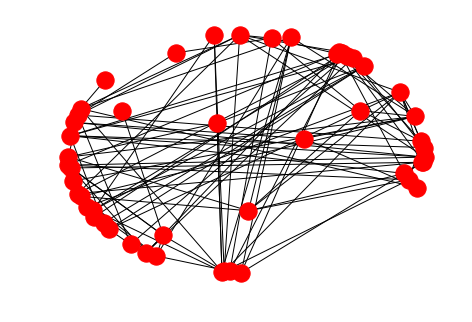

In [75]:
nx.draw(Graph)
plt.show()

In [48]:
cur_pref = nx.get_node_attributes(Graph,'pref')
initial_time = 0
for node in Graph.nodes():
    friends_pref[initial_time][node] = {}
    for neighbor in Graph.neighbors(node):
        friends_pref[initial_time][node][neighbor] = [[cur_pref[node][dim], Graph[node][neighbor]['weight']] for dim in range(pref_dim)]
initial_number = 5
adopted_choice = {node: [0] for node in random.choice(Graph.nodes(), initial_number)}    
forceful = {}
force = 0
while force < 5:
    rd = np.random.choice(Graph.nodes(), 1)[0]


In [49]:
np.random.choice(Graph.nodes(), 5)

array([11,  7, 11, 13,  9])

In [30]:
cur_pref = nx.get_node_attributes(G, 'pref')
cur_weight = nx.get_node_attributes(G, 'weights')
for n in G.nodes():
    friends_pref[0][n] = {}
    for neib in G.neighbors(n):
        friends_pref[0][n][neib] = [[current_pref[n][d], G[n][neib]['weight'] ] for d in range(dim)]
adopted_dic = {n: [0] for n in random.choice(G.nodes(), 5)}
forceful = {}
force = 0
while force < 5:
    rd = random.choice(G.nodes(), 1)[0]
    if rd not in adopted_dic:
        forceful[rd] = [0]
        force += 1

{0: [2],
 1: [5],
 2: [5],
 3: [8],
 4: [9],
 5: [4],
 6: [5],
 7: [9],
 8: [7],
 9: [4],
 10: [1],
 11: [7],
 12: [2],
 13: [9],
 14: [1],
 15: [6],
 16: [6],
 17: [7],
 18: [3],
 19: [3]}

In [42]:
Graph.edge

{0: {2: {'weight': -1.3626873481403852},
  4: {'weight': -12.056259701101746},
  6: {'weight': 6.63270995534962},
  8: {'weight': 0.8761179292109034},
  9: {'weight': -3.193717530721007},
  13: {'weight': 2.4719149071688844}},
 1: {2: {'weight': 11.26111659116499},
  3: {'weight': -15.07273974144292},
  5: {'weight': 5.565890382452671},
  8: {'weight': 2.4453852535191927},
  9: {'weight': 21.5817771601148},
  11: {'weight': 12.857371575005502},
  15: {'weight': 13.869496367192063},
  18: {'weight': 5.133396687612516}},
 2: {0: {'weight': -1.3626873481403852},
  1: {'weight': 11.26111659116499},
  3: {'weight': -5.282196017716148},
  4: {'weight': -3.0440571827154113},
  7: {'weight': -5.658590292439248},
  8: {'weight': -11.676274448326344},
  11: {'weight': 10.519021494772996},
  12: {'weight': 24.20740692086625},
  13: {'weight': -9.453600605979931},
  14: {'weight': -10.469849098426142},
  16: {'weight': 30.664349819892124},
  17: {'weight': 2.449647030021503},
  19: {'weight': 5.41

In [54]:
def create_network(total_nodes, p, pref_range, grph = 'erdo', dim = 3, mean_pref= 0, std_pref = 10):
    ### Generate One-dimension-opinion Erdos-Renyi Network (100, 0.05)
    ### Assign Uniform preference [1, 10] to each node with dimension of "dim"
    friends_estimation = {}
    friends_estimation[0] = {}
    if grph == 'erdo':
        G = nx.erdos_renyi_graph(total_nodes, p)
    for n in G.nodes():
        G.node[n]['preference']=[np.random.randint(1,pref_range) for i in range(dim)]

    es = G.edges()
    edges = np.random.normal(mean_pref, std_pref, len(es))

    for e in range(len(es)):
        G.add_weighted_edges_from([(es[e][0], es[e][1], edges[e])])

    # initialize the estimation on friends preference
    current_pref = nx.get_node_attributes(G, 'preference')
    current_weight = nx.get_node_attributes(G, 'weights')
    for n in G.nodes():
        friends_estimation[0][n] = {}
        for neib in G.neighbors(n):
            friends_estimation[0][n][neib] = [[current_pref[n][d], G[n][neib]['weight'] ] for d in range(dim)]
    adopted_dic = {n: [0] for n in np.random.choice(G.nodes(), 5)}
    forceful = {}
    force = 0
    while force < 5:
        rd = np.random.choice(G.nodes(), 1)[0]
        if rd not in adopted_dic:
            forceful[rd] = [0]
            force += 1

    return G, friends_estimation, adopted_dic, forceful


In [57]:
G, f_e, adopted_dic, forceful = create_network(total_nodes = 50, p = 0.08, pref_range = 10)
#X_list = [[-5, -5], [-2, -3], [-4, -1], [-3, -1]]
X_list = [[5, 5]]
#X_list = [[-5, -5],[5, 5],[5, 9],[5, 1]]; iters = 2

global added

adopted_dic2 = copy.deepcopy(adopted_dic)
G_2 = copy.deepcopy(G)

added = False
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='pink', edgecolor='k')
policies = ['balanced', 'greedy', 'epsilon_greedy', 'ucb', 'Thompson']

In [58]:
plt.show()